%%html
<style>
    .myblock {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
    }
    
    .exercise {
        background-color: #AFEEEE;
    }
    
    .theorem {
        background-color: #FEC4A3;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Continuous stochastic processes</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Homework 1</b></center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [13]:
import matplotlib.pyplot as plt
from scipy.special import factorial
import numpy as np

<div class="myblock exercise">
<h1>Exercise 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

A Poisson process with rate $\lambda$ can be defined as a counting process $\{N(t); t \ge0 \}$ with the following properties:
    
(a) $N(0) = 0$

(b) $N(t)$  has independent and stationary increments.
    
(c) Let $\Delta N(t) = N(t + \Delta t) - N(t)$ with $\Delta t \rightarrow 0^+$. The following relations hold:
    
$$
\begin{align}
    \mathbb P[\Delta N(t) = 0] & \; = 1 - \lambda \Delta t + o(\Delta t) \qquad & (1) \\ 
    \mathbb P[\Delta N(t) = 1] & \; = \lambda \Delta t + o(\Delta t) \qquad & (2) \\
    \mathbb P[\Delta N(t) \ge 2] & \; = o(\Delta t) \qquad & (3)
\end{align}
$$
    
<b>a)</b> From this definition show that

$$
    \mathbb P[N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t} \qquad (4) \\
$$  
     
<b>b)</b> Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theorical distribution of $\mathbb P[N(t) = n]$ given by the equation (4) for the values $\lambda=10$ and $t=2$.
</div>

### Solution to a)

We will prove equation (4) by an inductive procedure.

#### Case n=0:

From statement (c) we know that $N(t + \Delta t) = \Delta N(t) + N(t)$. Then:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = 0] & = \mathbb P[\Delta N(t) + N(t) = 0] \\ 
    & \stackrel{(*)}{=} \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = 0] \\
    & \stackrel{(1)}{=} \mathbb P[\Delta N(t) = 0] \;  (1 - \lambda \Delta t + o(\Delta t)) \\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = 0] - \mathbb P[\Delta N(t) = 0] } {\Delta t} = - \lambda \mathbb P[\Delta N(t) = 0] + \frac{o(\Delta t)}{\Delta t} \mathbb P[\Delta N(t) = 0]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = 0] = - \lambda \mathbb P[\Delta N(t) = 0]
$$

This is a linear homogeneus diferential equation, which only solution that satifies the initial condition $\mathbb P[\Delta N(t) = 0] = 1$ is

$$
    \mathbb P[\Delta N(t) = 0] = e^{-\lambda t}
$$

#### Case n>0:

Let's prove the $n$-case with our induction hypothesis for $n-1$:

$$
    \mathbb P[N(t) = n-1] = \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \qquad (5) \\
$$  

We begin with the same development as in the base case, but for and arbitrary $n$:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = n] & = \mathbb P[\Delta N(t) + N(t) = n] \\ 
    & \stackrel{(*)}{=} \sum_{k=0}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & = \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = n] \\
    & + \mathbb P[\Delta N(t) = 1] \; \mathbb P[N(t) = n-1] \\
    & + \sum_{k=2}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & \stackrel{(1,2,3)}{=} (1 - \lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n] \\
    & + (\lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=2}^n \mathbb \; \mathbb P[N(t) = n-k] \\
    & = (1 - \lambda \Delta t ) \; \mathbb P[N(t) = n] + \lambda \Delta t \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k] \\\
\end{align}
$$

where in $(*)$ we statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = n] - \mathbb P[\Delta N(t) = n] } {\Delta t} = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg) + \frac{o(\Delta t)}{\Delta t} \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg)
$$

Using the induction hypothesis (6) we obtain our differential equation:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg)
$$

Let us rename our space variable in the previous equation understand it better. We are looking for a function $y(t)$ such that

$$
    \frac{\text d} {\text dt} y(t) = - \lambda \bigg( y(t) - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg) \qquad (6) \\
$$

This differential equation is not linear and, as such, we can solve it using separated variables as we did in the base case. We may use Picard-Lindelöf's Theorem to prove that the solution is unique, and then prove that (4) is a solution to the equation (6). Thus, proving that is the only solution.

<div class="myblock theorem">
<h1>Theorem (Picard Lindelöf's)</h1>

Consider the initial value problem

$$
    \frac{\text d} {\text dt} y(t) = f(t,y(t)), \qquad y(t_{0})=y_{0}.
$$
    
Suppose $f$ is uniformly Lipschitz continuous in $y$ (meaning the Lipschitz constant can be taken independent of $t$) and continuous in $t$, then there exists a unique solution $y(t)$ to the initial value problem.
</div>

Since our function $f(t,y(t))$ is continuous in $t$, we just need to prove that is uniformly Lipschitz continuous in $y$.

$$
    \frac{\text d} {\text dy} f(t,y(t)) = - \lambda \in \mathbb R
$$

Since the derivative with respect to $y$ of $f$ is constant, $f$ is uniformly Lipschitz continuous and our initial value problem given by teh equation (6) and the initial condition $\mathbb P[\Delta N(t) = n] = 0$ is unique.

We just need to prove that (4) is a solution to the differential equation (6). Let $x(t)$ be

$$
    x(t) \equiv \frac{1}{n!} \lambda^n t^n e^{-\lambda t}.
$$  

Then,

$$
\begin{align}
    \frac{\text d} {\text dt} x(t) & = \frac{-\lambda^{n+1} t^{n}}{n!} e^{-\lambda t} + \frac{\lambda^{n} t^{n-1}}{(n-1)!} e^{-\lambda t} \\ 
    & = -\lambda \bigg(\frac{-\lambda^{n} t^{n}}{n!} e^{\lambda t} - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg) \\
    & = -\lambda \bigg(x(t) - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg)
\end{align}
$$

Proving that $x(t)$ as defined in equation (4) is a solution to the differential equation.

### Solution to b)

[0.000e+00 1.000e-02 2.000e-02 ... 1.497e+01 1.498e+01 1.499e+01]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 2.06115362e-09  4.12230724e-08  4.12230724e-07  2.74820483e-06
  1.37410241e-05  5.49640966e-05  1.83213655e-04  5.23467587e-04
  1.30866897e-03  2.90815326e-03  8.20137262e-04  1.28567044e-04
 -1.28201965e-05  3.56878511e-06  1.07086369e-07 -7.90483108e-08]


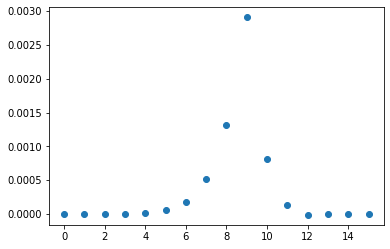

In [37]:
def theoretical_distribution(t, n, lamb):
    """"
        Computes the theoretical value of a process counting process with
        rate lambda. I.e.: P[N(t) = n].
        
        - t is the time, can be a single value or a numpy array
        - n is the number counted, can be a single value or a numpy array
        - lambda is the rate, a float
        
        When both t and n are vector, the funcion is applied pair-wise, given
        that the arrays have the same length.
    """
    return 1/factorial(n) * lamb**n * t ** n * np.exp(- lamb * t)

def exercise_1(t=2, n=np.arange(0,16), lamb=10):
    x = np.arange(0, 15, 0.01)

    y_theoretical = theoretical_distribution(t, n, lamb)    
    print(n)
    print(y_theoretical)
    plt.scatter(n, y_theoretical)
    
print(np.arange(0, 15, 0.01))
exercise_1()